# Section3：過学習

## 過学習とは
- テスト誤差と訓練誤差とで学習曲線が乖離すること \
　⇒特定の訓練サンプルに対して、特化して学習する
 
### 原因
- パラメータの数が多い
- パラメータの値が適切でない
- ノードが多いetc..

#### ゼロから作るディープラーニング　6.4.1 過学習

■■■■■

# 正則化

正則化とは︖ \
ネットワークの自由度(層数、ノード数、パラメータの値etc...)を制約すること \
　⇒正則化手法を利用して過学習を抑制する

#### ゼロから作るディープラーニング　6.4 正則化

■■■■■

## 正則化手法
- L1正則化（Lasso）、L2正則化（リッジ回帰）
- ドロップアウト

## Weight decay(荷重減衰)

### 過学習の原因
- 重みが大きい値をとることで、過学習が発生することがある。
 - 学習させていくと、重みにばらつきが発生する。
 - 重みが大きい値は、学習において重要な値であり、重みが大きいと過学習が起こる。

### 過学習の解決策
- 誤差に対して、正則化項を加算することで、重みを抑制する
 - 過学習がおこりそうな重みの大きさ以下で重みをコントロールし、かつ重みの大きさにばらつきを出す必要がある。

#### ゼロから作るディープラーニング　6.4.2 Weight decay

■■■■■

### ドロップアウト

#### 過学習の課題 
- ノードの数が多い 

#### ドロップアウトとは︖ 
- ランダムにノードを削除して学習させること

#### メリット
- データ量を変化させずに、異なるモデルを学習させていると解釈できる


#### ゼロから作るディープラーニング　6.4.3 Dropout

■■■■■

# 確認テスト

#### P53

問） \
機械学習で使われる線形モデル(線形回帰、主成分分析…etc)の正則化は、モデルの重みを制限することで可能となる。 \
前述の線形モデルの正則化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。

(a) ハイパーパラメータを大きな値に設定すると、全ての重みが限りなく０に近づく。 \
(b) ハイパーパラメータを０に設定すると、非線形回帰となる。 \
(c) バイアス項についても、正則化される。 \
(d) リッジ回帰の場合、隠れ層に対して正則化項を加える。

答） \
(a)、■■■■

#### P64

問）下図について、L1正則化を表しているグラフはどちらか答えよ。

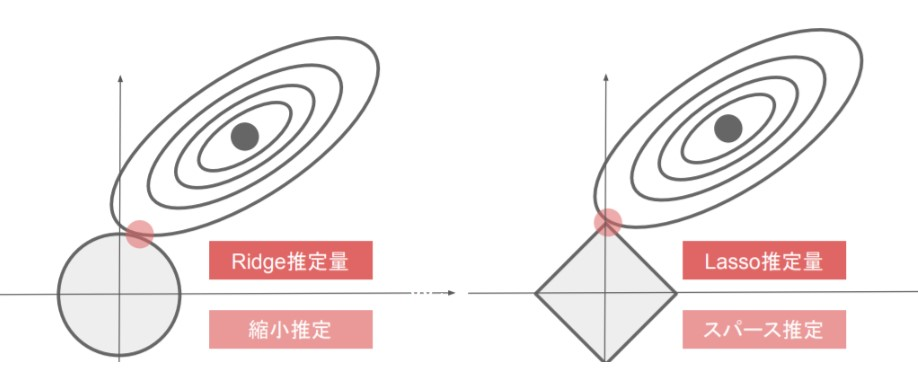

In [1]:
from IPython.display import Image
Image("./Section3_確認テスト2.jpg")

答）右側